In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
emissions_data_path = "../Data/Raw_Data/CO2Data.csv"
pop_data_path = "../Data/Raw_Data/pop_data.csv"
emissions_df = pd.read_csv(emissions_data_path)
pop_df = pd.read_csv(pop_data_path)

pop_df.head()
emissions_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.620372,208.822811,226.118079,214.800370,207.615777,185.203958,...,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374,8.426911,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556,0.245101,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245,1.202861,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648,1.577163,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.122595,5.867410,5.916884,5.901775,5.832906,5.969786,6.072370,NaN,NaN,NaN


In [13]:
#for col in emissions_df.columns: 
#    print(col) 
#world_co2_df = emissions_df.drop(['Country Name', 'Country Code','Indicator Name','Indicator Code', '2017', '2018','2019'])
#emissions_df = emissions_df.append(emissions_df.agg(['sum']))
emissions_df.head(-1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.620372,208.822811,226.118079,214.800370,207.615777,185.203958,...,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374,8.426911,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556,0.245101,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245,1.202861,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648,1.577163,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.122595,5.867410,5.916884,5.901775,5.832906,5.969786,6.072370,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727221,5.832621,5.887170,5.961336,6.332342,6.616544,...,9.173055,9.179457,8.794997,8.553336,8.882322,8.376655,8.480658,NaN,NaN,NaN
262,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,0.946606,1.096876,...,0.197823,0.208412,0.254267,0.265078,0.292412,0.285428,0.314183,NaN,NaN,NaN
263,Zimbabwe,ZWE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,1.034903,1.166242,...,0.614549,0.746236,0.600303,0.881705,0.891739,0.891624,0.782777,NaN,NaN,NaN
sum,ArubaAfghanistanAngolaAlbaniaAndorraArab World...,ABWAFGAGOALBANDARBAREARGARMASMATGAUSAUTAZEBDIB...,CO2 emissions (metric tons per capita)CO2 emis...,EN.ATM.CO2E.PCEN.ATM.CO2E.PCEN.ATM.CO2E.PCEN.A...,639.024700,668.889508,710.397605,805.384413,850.040703,854.546309,...,1211.755092,1201.325925,1254.452077,1231.757958,1232.062777,1179.256299,1164.410805,0.0,0.0,0.0


In [3]:
us_co2_series = emissions_df.loc[249]
us_co2_df = us_co2_series.to_frame()

In [4]:
us_clean_df = us_co2_df.drop(['Country Name', 'Country Code','Indicator Name','Indicator Code', '2017', '2018','2019'])
us_clean_df['Year'] = us_clean_df.index
us_em_df = us_clean_df.rename(columns={249:"Metric ton per Capita Emissions"})

us_em_df = us_em_df[['Year', 'Metric ton per Capita Emissions']]

us_em_df.head()


,Year,Metric ton per Capita Emissions
1960,1960,15.9998
1961,1961,15.6813
1962,1962,16.0139
1963,1963,16.4828
1964,1964,16.9681


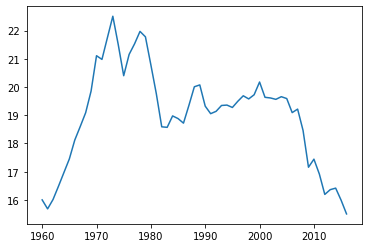

In [9]:
us_emission_line = us_em_df.plot.line(legend=None)
#plt.show

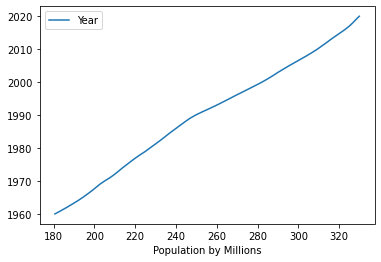

In [10]:
us_pop_line = pop_df.plot.line(x='Population by Millions', y='Year')

In [11]:
#pop_df = pop_df.to_frame()
#us_em_df = us_em_df.to_frame()

    #Shows data types
#pop_df.dtypes
print(type(pop_df))  

#us_em_df.dtypes
print(type(us_em_df))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
pop_df = pop_df.astype(int)
us_em_df = us_em_df.astype(int)

#pop_df = pop_df.to_numeric(pop_df.year)
#us_em_df = us_em_df.to_numeric(us_em_df.year)

In [13]:
merged_data = pop_df.merge(us_em_df)

merged_data.head()

,Year,Population by Millions,Metric ton per Capita Emissions
0,2016,322,15
1,2015,320,15
2,2014,318,16
3,2013,315,16
4,2012,313,16


In [14]:
merged_data = merged_data.rename(columns={'Population by Millions':"pop", 'Metric ton per Capita Emissions':'emissions'})
merged_data.dtypes

merged_data['US Total Emmissions'] = merged_data['pop'] * merged_data['emissions']

merged_data.head()

,Year,pop,emissions,US Total Emmissions
0,2016,322,15,4830
1,2015,320,15,4800
2,2014,318,16,5088
3,2013,315,16,5040
4,2012,313,16,5008


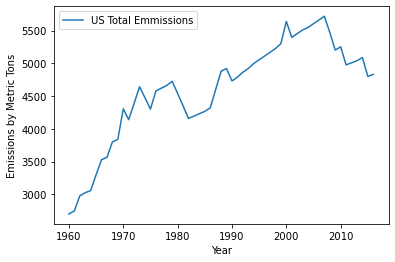

In [19]:
x = merged_data['Year']
y = merged_data['US Total Emmissions']

#plt(x,y)
us_total_emissions_line = merged_data.plot.line(x='Year', y='US Total Emmissions')
plt.ylabel("Emissions by Metric Tons")
plt.savefig("../Images/UsEmissionsTrend.png")
plt.show()

In [15]:
final_csv_location = "Data/Cleaned_data/Year_CO2_Pop_data.csv"
merged_data.to_csv(final_csv_location)